<h3>DATA CLEANING AND Processing</h3>

In [166]:
# Importing required modules
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
from scipy import stats
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
data = pd.read_csv('data.csv')
data.head()

,Description,Price,Rating,Review_Count,displaySize,Memory,Color,Brand,Url
0,Moto G Stylus | 2022 | 2-Day battery | Unlocke...,$267.52,4.3 out of 5 stars,"1,051",6.8 inches,128 GB,128 GB,Motorola,https://www.amazon.com/Stylus-battery-Unlocked...
1,Samsung Electronics Galaxy Note 20 5G Unlocked...,$255.99,4.2 out of 5 stars,"1,430",6.7 inches,128.0 GB,Mystic Gray,SAMSUNG,https://www.amazon.com/Samsung-Electronics-Unl...
2,"Samsung Galaxy S10e, 128GB, Flamingo Pink - Un...",$128.00,4.3 out of 5 stars,"11,912",5.80 inches,128 GB,Flamingo Pink,SAMSUNG,https://www.amazon.com/Samsung-Factory-Unlocke...
3,"TracFone TCL Flip 2, 8GB, Black - Prepaid Flip...",$19.99,4.0 out of 5 stars,370,1.44 inches,8 GB,Black,TracFone,https://www.amazon.com/TracFone-Flip-Prepaid-P...
4,SAMSUNG Galaxy A03 Core (SM-A032/DS) Dual SIM ...,$85.79,3.9 out of 5 stars,"1,402",6.5 inches,32 GB,Black,SAMSUNG,https://www.amazon.com/Samsung-Galaxy-A03-Core...


In [168]:
data.shape

(2535, 9)

In [169]:
data.nunique()

Description      391
Price            257
Rating            29
Review_Count     171
displaySize       64
Memory            39
Color            110
Brand             81
Url             2535
dtype: int64

In [170]:
data['Price'] = [i[1:] for i in data['Price']]
data['displaySize'] = data['displaySize'].astype(str) # convert float values to string
data['displaySize'] = [i[:-7] for i in data['displaySize']]
data['Memory'] = data['Memory'].astype(str)
data['Memory'] = [i[:-3] for i in data['Memory']]
data['Description'] = [x.lower() for x in data['Description']]
data['Brand'] = [x.lower() for x in data['Brand'].astype(str)]
data['Color'] = [x.lower() for x in data['Color'].astype(str)]
data['Color'] = data['Color'].str.replace(' ', '')
data['Brand'] = data['Brand'].str.replace(' ', '')

new_df = data.dropna()
new_df[['displaySize','Memory']]  = new_df[['displaySize','Memory']].fillna('-1')
new_df['Color'] = [re.sub(r'\d+\w+','black', x) for x in new_df['Color']]
new_df['Price'] = [float(i.replace(',', '')) for i in new_df['Price']]
new_df['Price'] = [float(i) for i in new_df['Price']]
new_df['Memory'] = [x.lower() for x in new_df['Memory']]
new_df['Memory'] = [i.replace('gb', '') for i in new_df['Memory']]
new_df['Memory'] = [i.replace('millilit', '') for i in new_df['Memory']]
new_df['Review_Count'] = [float(i.replace(',', '')) for i in new_df['Review_Count']]
new_df['Review_Count'] = [float(i) for i in new_df['Review_Count']]
new_df['Rating'] = new_df['Rating'].apply(lambda x: re.sub('[^0-9.]', '', x))
new_df = new_df.dropna(subset=['Rating'], how='all')
# Convert Rating column to float
new_df['Rating'] = pd.to_numeric(new_df['Rating'], errors='coerce')
new_df.dropna(subset=['Rating'], inplace=True)


C:\Users\harsha\AppData\Local\Temp\ipykernel_13592\4198393988.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['displaySize','Memory']]  = new_df[['displaySize','Memory']].fillna('-1')
C:\Users\harsha\AppData\Local\Temp\ipykernel_13592\4198393988.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Color'] = [re.sub(r'\d+\w+','black', x) for x in new_df['Color']]
C:\Users\harsha\AppData\Local\Temp\ipykernel_13592\4198393988.py:15: SettingWithCopyWarning: 
A value is trying to be set on a

In [171]:
data.head()

,Description,Price,Rating,Review_Count,displaySize,Memory,Color,Brand,Url
0,moto g stylus | 2022 | 2-day battery | unlocke...,267.52,4.3 out of 5 stars,"1,051",6.8,128,128gb,motorola,https://www.amazon.com/Stylus-battery-Unlocked...
1,samsung electronics galaxy note 20 5g unlocked...,255.99,4.2 out of 5 stars,"1,430",6.7,128.0,mysticgray,samsung,https://www.amazon.com/Samsung-Electronics-Unl...
2,"samsung galaxy s10e, 128gb, flamingo pink - un...",128.00,4.3 out of 5 stars,"11,912",5.80,128,flamingopink,samsung,https://www.amazon.com/Samsung-Factory-Unlocke...
3,"tracfone tcl flip 2, 8gb, black - prepaid flip...",19.99,4.0 out of 5 stars,370,1.44,8,black,tracfone,https://www.amazon.com/TracFone-Flip-Prepaid-P...
4,samsung galaxy a03 core (sm-a032/ds) dual sim ...,85.79,3.9 out of 5 stars,"1,402",6.5,32,black,samsung,https://www.amazon.com/Samsung-Galaxy-A03-Core...


In [172]:
new_df.head()

,Description,Price,Rating,Review_Count,displaySize,Memory,Color,Brand,Url
0,moto g stylus | 2022 | 2-day battery | unlocke...,267.52,4.35,1051.0,6.8,128,black,motorola,https://www.amazon.com/Stylus-battery-Unlocked...
1,samsung electronics galaxy note 20 5g unlocked...,255.99,4.25,1430.0,6.7,128.0,mysticgray,samsung,https://www.amazon.com/Samsung-Electronics-Unl...
2,"samsung galaxy s10e, 128gb, flamingo pink - un...",128.00,4.35,11912.0,5.80,128,flamingopink,samsung,https://www.amazon.com/Samsung-Factory-Unlocke...
3,"tracfone tcl flip 2, 8gb, black - prepaid flip...",19.99,4.05,370.0,1.44,8,black,tracfone,https://www.amazon.com/TracFone-Flip-Prepaid-P...
4,samsung galaxy a03 core (sm-a032/ds) dual sim ...,85.79,3.95,1402.0,6.5,32,black,samsung,https://www.amazon.com/Samsung-Galaxy-A03-Core...


In [173]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1885.0,224.721231,447.368889,5.99,64.99,129.99,189.99,3799.99
Rating,1885.0,3.891326,0.727154,1.05,3.75,3.95,4.35,5.05
Review_Count,1885.0,862.277984,3642.558408,1.00,30.00,179.00,426.00,50695.00


In [174]:
# array of data
data = new_df['Color']
# Tokenize each element in the array
tokenized_data = [nltk.word_tokenize(sentence) for sentence in data]
# Create a frequency distribution of the tokens
freq_dist = nltk.FreqDist(token for sentence in tokenized_data for token in sentence)
# Map each unique token to a unique number
token_to_num = {token: num for num, (token, _) in enumerate(freq_dist.items())}
# Tokenize the data using the mapping
tokenized_data_nums = [[token_to_num[token] for token in sentence] for sentence in tokenized_data]
# Print the tokenized data with numbers
new_df['Color'] = tokenized_data_nums
new_df['Color'] = [min(i) for i in new_df['Color']]
# array of data
data = new_df['Brand']
# Tokenize each element in the array
tokenized_data = [nltk.word_tokenize(sentence) for sentence in data]
# Create a frequency distribution of the tokens
freq_dist = nltk.FreqDist(token for sentence in tokenized_data for token in sentence)
# Map each unique token to a unique number
token_to_num = {token: num for num, (token, _) in enumerate(freq_dist.items())}
# Tokenize the data using the mapping
tokenized_data_nums = [[token_to_num[token] for token in sentence] for sentence in tokenized_data]
# Print the tokenized data with numbers
new_df['Brand'] = tokenized_data_nums
new_df['Brand'] = [min(i) for i in new_df['Brand']]
new_df['Color'] = new_df['Color'].apply(str)
new_df['Brand'] = new_df['Brand'].apply(str)
new_df = new_df.drop_duplicates()
new_df.head()

,Description,Price,Rating,Review_Count,displaySize,Memory,Color,Brand,Url
0,moto g stylus | 2022 | 2-day battery | unlocke...,267.52,4.35,1051.0,6.8,128,0,0,https://www.amazon.com/Stylus-battery-Unlocked...
1,samsung electronics galaxy note 20 5g unlocked...,255.99,4.25,1430.0,6.7,128.0,1,1,https://www.amazon.com/Samsung-Electronics-Unl...
2,"samsung galaxy s10e, 128gb, flamingo pink - un...",128.00,4.35,11912.0,5.80,128,2,1,https://www.amazon.com/Samsung-Factory-Unlocke...
3,"tracfone tcl flip 2, 8gb, black - prepaid flip...",19.99,4.05,370.0,1.44,8,0,2,https://www.amazon.com/TracFone-Flip-Prepaid-P...
4,samsung galaxy a03 core (sm-a032/ds) dual sim ...,85.79,3.95,1402.0,6.5,32,0,1,https://www.amazon.com/Samsung-Galaxy-A03-Core...


<h3>Feature Addition</h3>

In [175]:
substring = 'unlocked'
unlocked = []
for i in new_df['Description']:
    if substring in i:
        unlocked.append(1)
    else:
        unlocked.append(0)
new_df['Unlocked'] = unlocked
substring = 'renew'
renew = []
for i in new_df['Description']:
    if substring in i:
        renew.append(1)
    else:
        renew.append(0)
new_df['renew'] = renew

In [176]:
new_df.shape

(1885, 11)

In [177]:
# Relevant features 
new_data = new_df
new_data= new_data[['Price' , 'Rating' , 'Review_Count' , 'displaySize' ,'Memory','Color','Brand','Unlocked','renew']]
new_data['displaySize'] = [float(i) if i!='' else 6.0 for i in new_data['displaySize']]
new_data.to_csv('new_df.csv', index=False)
new_data.head()

C:\Users\harsha\AppData\Local\Temp\ipykernel_13592\2825263243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['displaySize'] = [float(i) if i!='' else 6.0 for i in new_data['displaySize']]


,Price,Rating,Review_Count,displaySize,Memory,Color,Brand,Unlocked,renew
0,267.52,4.35,1051.0,6.80,128,0,0,1,0
1,255.99,4.25,1430.0,6.70,128.0,1,1,1,1
2,128.00,4.35,11912.0,5.80,128,2,1,1,1
3,19.99,4.05,370.0,1.44,8,0,2,0,0
4,85.79,3.95,1402.0,6.50,32,0,1,1,0


In [178]:
new_data = pd.read_csv('new_df.csv')
temp=[]
for i in range(len(new_data['Price'])):
    if new_data['Memory'][i]!='':
        temp.append(float(new_data['Memory'][i]))
    else:
        if float(new_data['Price'][i])<50.0:
            temp.append(4.0)
        elif float(new_data['Price'][i])>50.0 and float(new_data['Price'][i])<200.0:
            temp.append(32.0)
        elif float(new_data['Price'][i])>200.0 and float(new_data['Price'][i])<1000.0 :
            temp.append(128.0)
        else:
            temp.append(256.0)

new_data['Memory'] = temp

In [179]:
len(new_data['Rating'])

1885

In [180]:
temp = []
for i in new_data['Rating']:
    if(i<0.8):
        temp.append(0)
    elif(i>=0.8 and i<1.8):
        temp.append(1)
    elif(i>=1.8 and i<2.8):
        temp.append(2)
    elif(i>=2.8 and i<3.8):
        temp.append(3)
    elif(i>=3.8 and i<4.5):
        temp.append(4)
    elif(i>=4.5 and i<=5):
        temp.append(5)
    else:
        temp.append(0)

new_data['Revised_Rating'] = temp


In [181]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1885.0,224.721231,447.368889,5.99,64.99,129.99,189.99,3799.99
Rating,1885.0,3.891326,0.727154,1.05,3.75,3.95,4.35,5.05
Review_Count,1885.0,862.277984,3642.558408,1.00,30.00,179.00,426.00,50695.00
displaySize,1885.0,6.176881,1.102664,1.40,6.00,6.00,6.53,10.10
Memory,1181.0,94.879983,163.067350,0.00,15.00,32.00,128.00,1024.00
Color,1885.0,22.204775,19.145783,0.00,10.00,19.00,22.00,78.00
Brand,1885.0,18.083820,9.150858,0.00,13.00,17.00,19.00,48.00
Unlocked,1885.0,0.595225,0.490979,0.00,0.00,1.00,1.00,1.00
renew,1885.0,0.014324,0.118853,0.00,0.00,0.00,0.00,1.00
Revised_Rating,1885.0,3.442440,1.139199,0.00,3.00,4.00,4.00,5.00


<h3>EDA(Exploratory data analysis)</h3>

<AxesSubplot:>

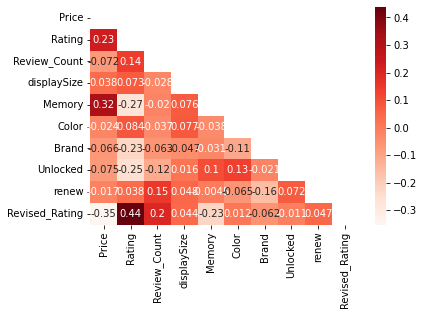

In [182]:
plt.figure(figsize=(6,4))
corr_data = new_data

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask = corr_mask, cmap = 'Reds', annot=True)
h_map

In [183]:
def Outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

In [184]:
data_rating = Outliers(new_data, 'Rating')

Outliers of Rating are removed.



In [185]:
data_price = Outliers(new_data, 'Price')

Outliers of Price are removed.



((array([-3.34574786, -3.09144144, -2.95019352, ...,  2.95019352,
          3.09144144,  3.34574786]),
  array([  5.99,   9.89,   9.89, ..., 369.99, 369.99, 369.99])),
 (78.61198709191345, 117.76143280047367, 0.9612647431751729))

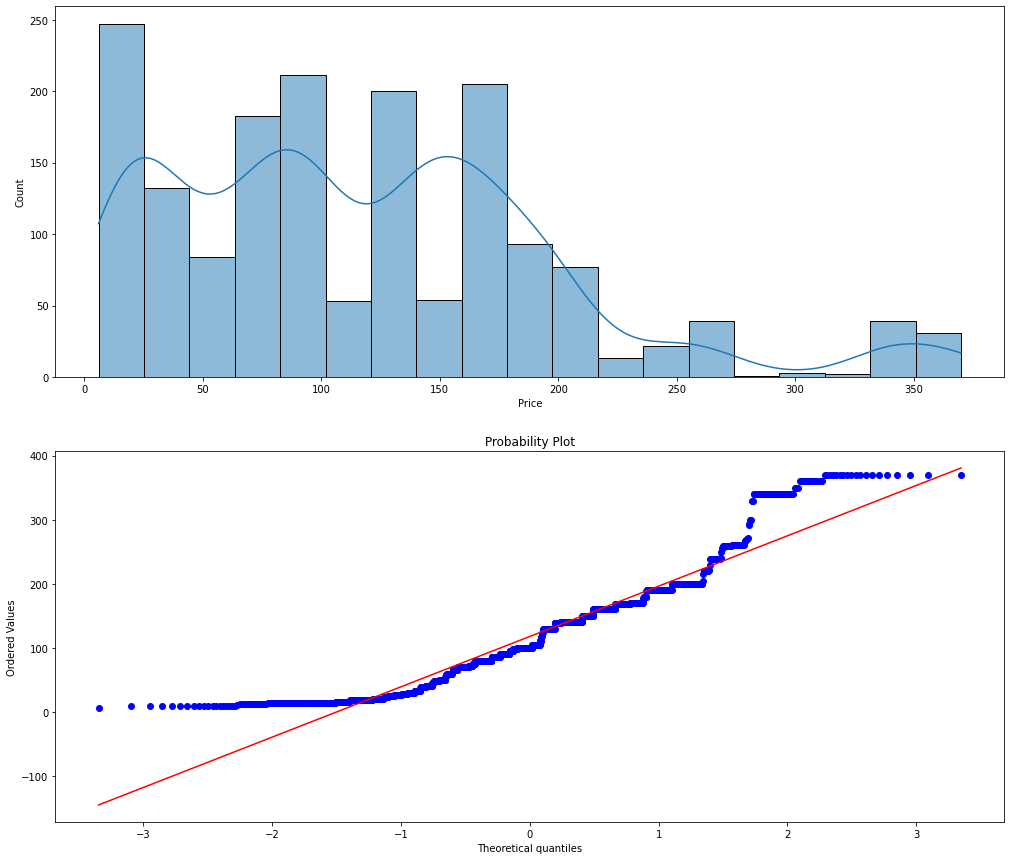

In [186]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data_price['Price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data_price['Price'], plot=ax2)

((array([-3.37606724, -3.12388528, -2.98394245, ...,  2.98394245,
          3.12388528,  3.37606724]),
  array([1.05, 1.05, 1.05, ..., 5.05, 5.05, 5.05])),
 (0.6598333433403832, 3.8913262599469496, 0.9062164282672998))

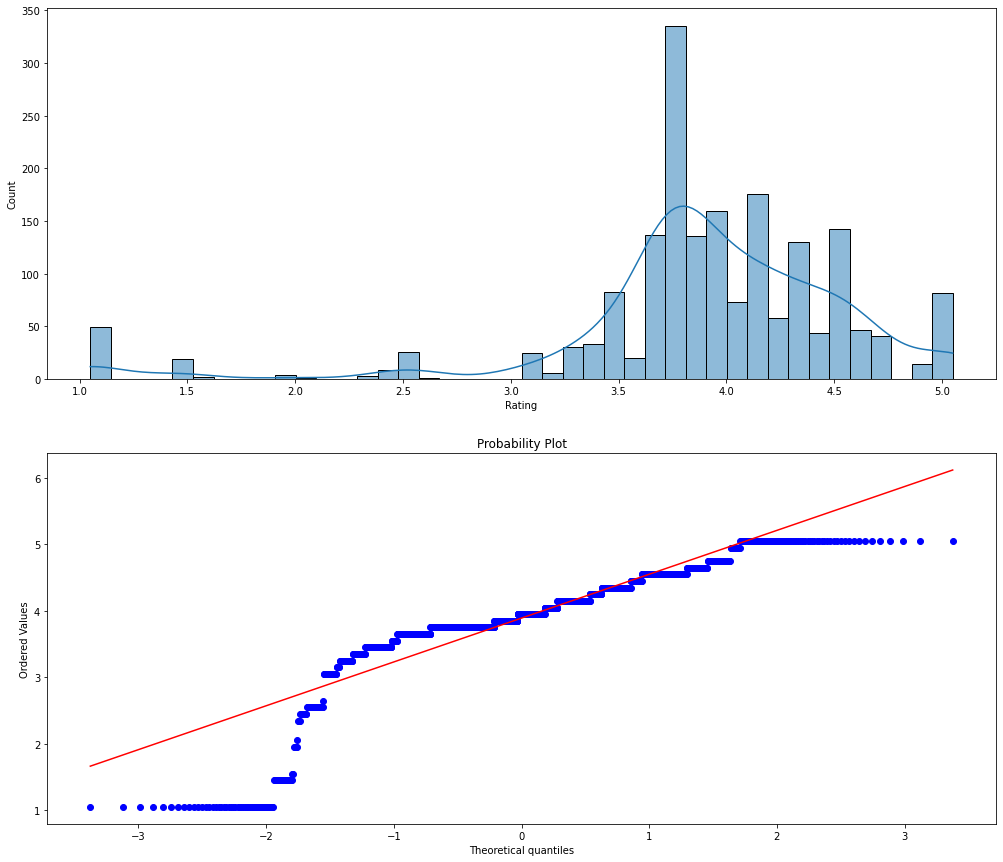

In [187]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data_rating['Rating'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1, :])
stats.probplot(data_rating['Rating'], plot=ax2)

<AxesSubplot:>

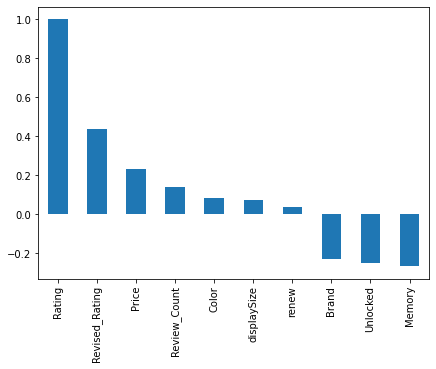

In [188]:
# Correlation of "Churn" with other variables
plt.figure(figsize=(7,5))
new_data.corr()['Rating'].sort_values(ascending = False).plot(kind='bar')

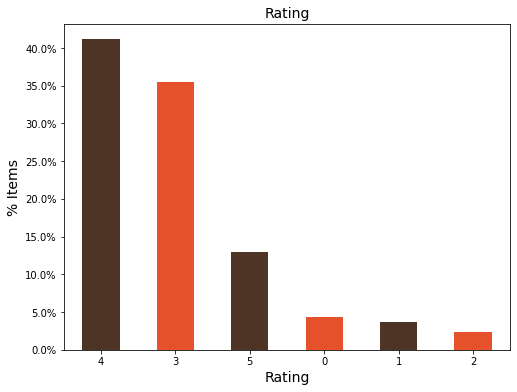

In [189]:
# Plotting the Churn rate in the dataset
colors = ['#4D3425','#E4512B']
ax = (new_data['Revised_Rating'].value_counts()*100.0 /len(new_data)).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Items',size = 14)
ax.set_xlabel('Rating',size = 14)
ax.set_title('Rating', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())


Text(0.5, 1.0, '% of Revised_Rating')

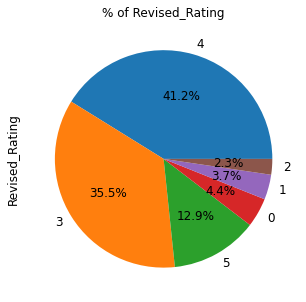

In [190]:
ax = (new_data['Revised_Rating'].value_counts()*100.0 /len(new_data))\
.plot.pie(autopct='%.1f%%', labels = ['4','3','5','0','1','2'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Revised_Rating',fontsize = 12)
ax.set_title('% of Revised_Rating', fontsize = 12)

In [191]:
new_data = new_data.dropna()

In [192]:
x = new_data[['Price' , 'Review_Count' , 'displaySize' ,'Memory','Color','Brand','Unlocked','renew']]
y= new_data[['Revised_Rating']]

In [193]:
#Seperating the Train, Test and Validation data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.33, random_state = 0)

In [194]:
print(X_test)

       Price  Review_Count  displaySize  Memory  Color  Brand  Unlocked  renew
876   139.99         549.0         6.53    64.0      0     13         1      0
1783  259.99        1271.0         6.50   128.0     78     13         1      0
1340  339.99          79.0         6.30    15.0      0     34         1      0
1482  159.99         222.0         6.53     4.0     11     13         1      0
1277  239.00           8.0         6.80     4.0      9     11         1      0
...      ...           ...          ...     ...    ...    ...       ...    ...
660    64.99          38.0         5.50     2.0      0     27         0      0
1767   69.99         130.0         2.00    16.0     27     20         1      0
1875   57.98         560.0         5.00    16.0     58     31         1      0
1330   69.99         123.0         1.80    16.0      0     20         1      0
1811  189.99         179.0         6.70     6.0     41     13         1      0

[237 rows x 8 columns]


In [195]:
#Standardized Scaling to fit the data in training the model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_validation=sc.transform(X_validation)

In [196]:
print(X_test[0])

[-0.2133653   0.05281398  0.20054712 -0.1871061  -0.98813581 -0.49893541
  0.32520203 -0.14496067]


In [197]:
y_train

,Revised_Rating
1614,5
1031,3
697,3
1602,3
573,3
...,...
1647,3
1166,4
1292,3
815,4


In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\Users\harsha\AppData\Local\Temp\ipykernel_13592\3162173856.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.9873417721518988


In [199]:
import joblib
# Save the model
joblib.dump(rfc, '..\\Project\\saved_models\\rfc_model.joblib')

['..\\Project\\saved_models\\rfc_model.joblib']

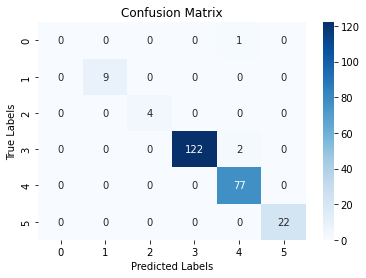

In [200]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [201]:
#Showing the Classification Report of Trained Decision Tree Model with test Data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      0.98      0.99       124
           4       0.96      1.00      0.98        77
           5       1.00      1.00      1.00        22

    accuracy                           0.99       237
   macro avg       0.83      0.83      0.83       237
weighted avg       0.98      0.99      0.99       237



c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
